In [2]:
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.fft import fft, fftfreq

In [5]:
data, fsamp = sf.read('./signalV 1.wav')

In [7]:
fsamp

192000

**Paso 1**. Encuentren la representación en el tiempo y en la frecuencia de la señal
entregada. Esto les permitirá saber que frecuencias pueden utilizar en la
demodulación.

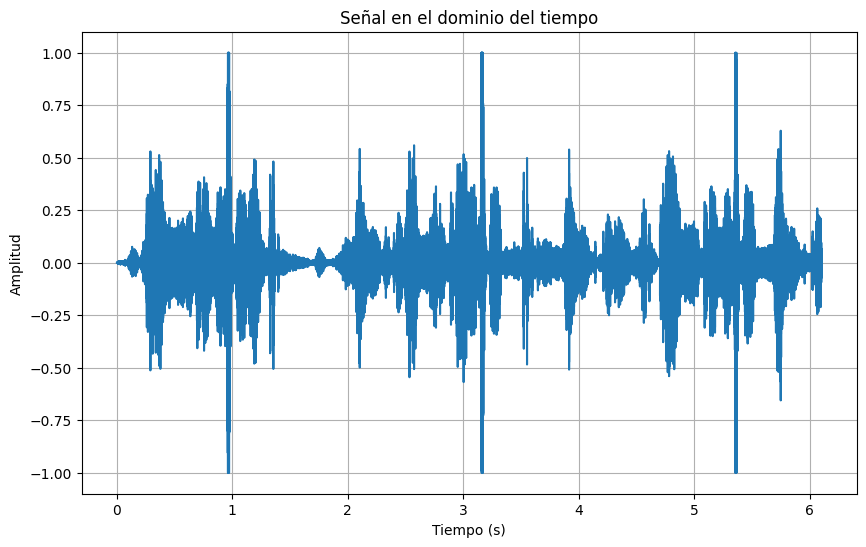

In [6]:
time = np.arange(0, len(data)) / fsamp
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

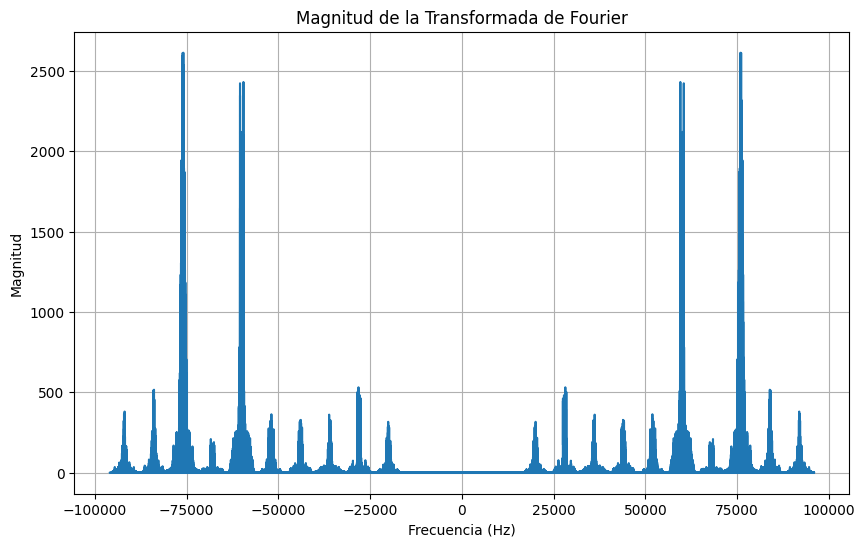

In [21]:
fft_data = fft(data)
freqs = fftfreq(len(data), 1/fsamp)

plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_data))
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

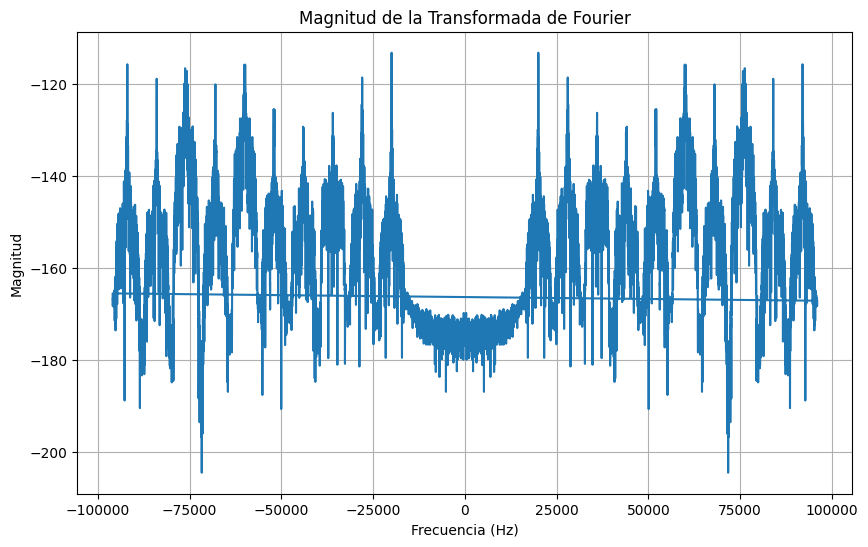

In [18]:
N = 8192

fft_data = fft(data,N)/len(data)
freqs = fftfreq(N, 1/fsamp)
Sx = 10*np.log10(np.abs(fft_data)**2)

# Graficar la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))
plt.plot(freqs, Sx)
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

**Paso 2**. Multipliquen la señal por la sinusoidal o exponencial compleja con la frecuencia que crean les permitirá trasladar a banda base la señal de interés

In [22]:
# frecuencia de la sinusoidal 
frecuencia_sinusoidal = 10000  # Hz

# señal sinusoidal
tiempo = np.arange(len(data)) / fsamp
sinusoidal = np.exp(-1j * 2 * np.pi * frecuencia_sinusoidal * tiempo)

# Multiplicar la señal de interés por la sinusoidal
senal_modulada = data * sinusoidal

**Paso 3**. Ejecute las líneas de código que le permitan diseñar el filtro

In [ ]:
fcorte = [350,450]
fcorte_rad = [310*2*np.pi,490*2*np.pi]

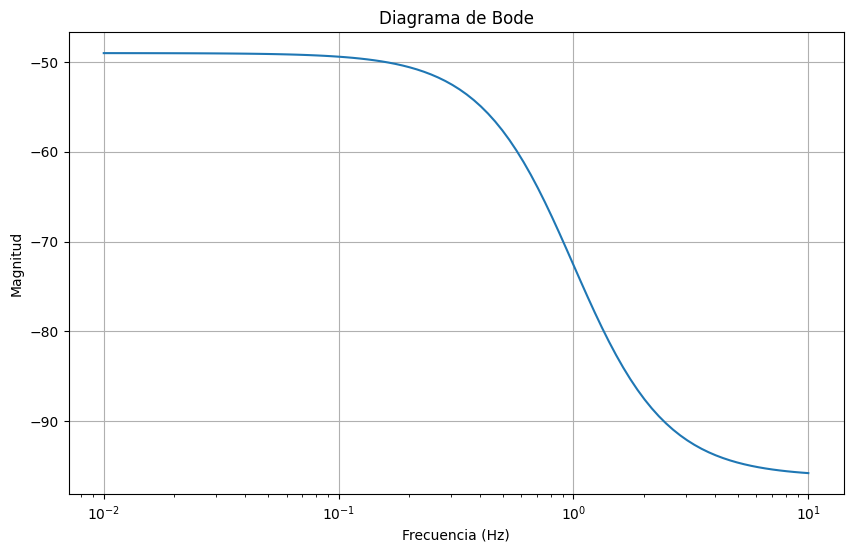

In [29]:
# Filtro pasa bajas

frecuencia_corte = 25000  # Frecuencia de corte del filtro en Hz
orden_filtro = 10  # Orden del filtro

# Diseñar el filtro pasa bajos
b, a = signal.butter(orden_filtro, frecuencia_corte, fs=fsamp, btype='lowpass')

sys = signal.TransferFunction(b,a)
w, mag, phase = signal.bode(sys)

# Diagrama de Bode
plt.figure(figsize=(10, 6))
plt.semilogx(w, mag)
plt.title('Diagrama de Bode')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


In [30]:
# Filtrar la señal
senal_filtrada = signal.lfilter(b, a, senal_modulada)


/home/santiago-pc/Documents/Universidad/nivel9/ProyectoSeniales/env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/santiago-pc/Documents/Universidad/nivel9/ProyectoSeniales/env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


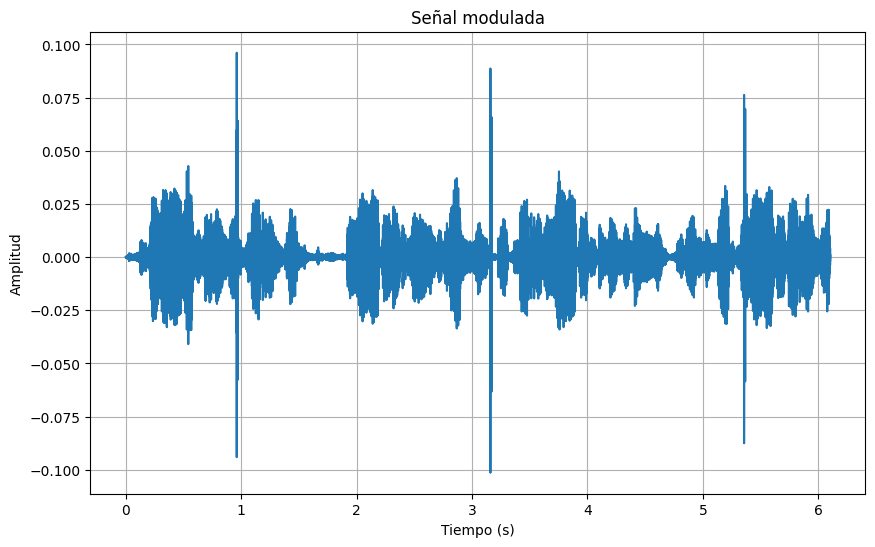

In [32]:
# Graficar la señal modulada
plt.figure(figsize=(10, 6))
plt.plot(tiempo, senal_filtrada)
plt.title('Señal modulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


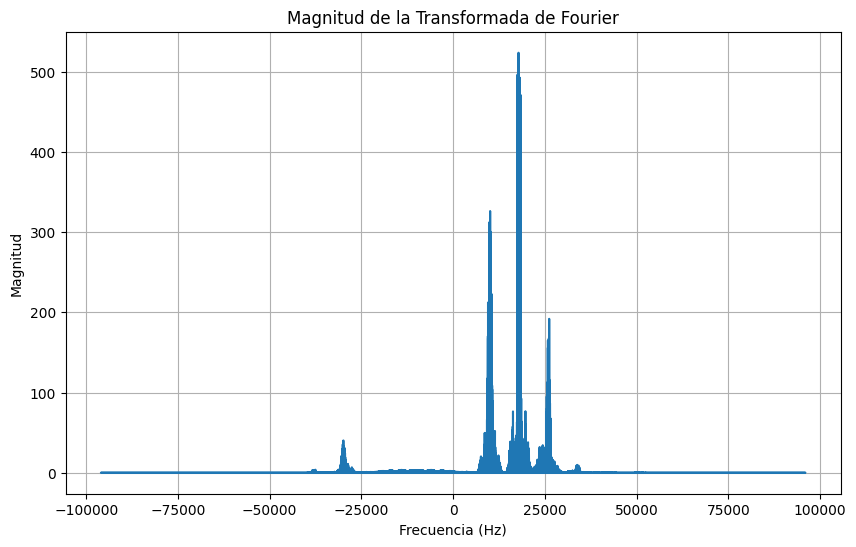

In [34]:
# Transformada de Fourier de la señal modulada
fft_senal_modulada = fft(senal_filtrada)
freqs = fftfreq(len(senal_filtrada), 1/fsamp)

# Graficar la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_senal_modulada))
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


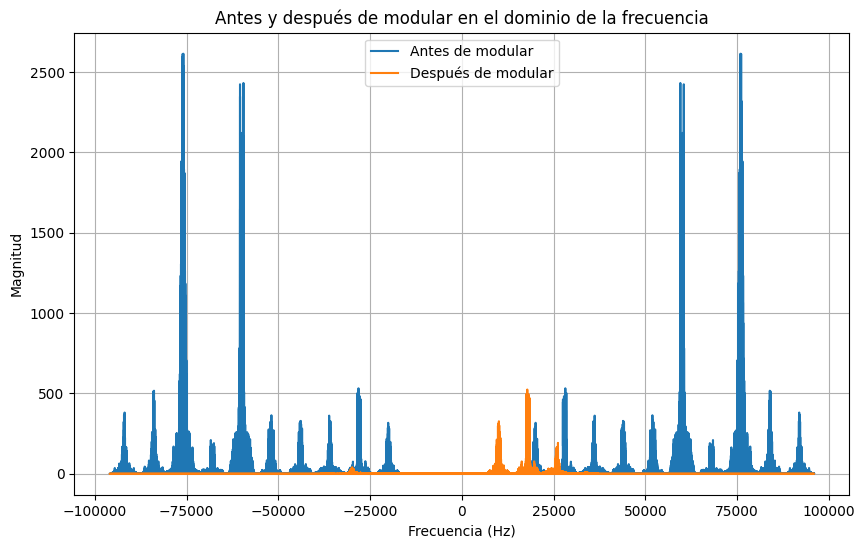

In [37]:
# Antes y después de la modulación en el dominio de la frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_data), label='Antes de modular')
plt.plot(freqs, np.abs(fft_senal_modulada), label='Después de modular')
plt.title('Antes y después de modular en el dominio de la frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
sd.play(data, fsamp)

PortAudioError: Error querying device -1